In [1]:
import findspark 
findspark.init()
import pyspark
findspark.find()


'C:\\spark\\spark-3.2.0-bin-hadoop3.2'

In [2]:
from pyspark import SparkConf,SparkContext
from pyspark.sql import SparkSession

conf = pyspark.SparkConf().setAppName('MyApp-1').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)

spark


In [3]:

file_data  = spark.read.csv(r'D:\Code_Place\Data-Science\Scikit Learn\dataset_1\trafficData158324.csv', inferSchema=True)
file_data.printSchema()


root
 |-- _c0: string (nullable = true)
 |-- _c1: integer (nullable = true)
 |-- _c2: integer (nullable = true)
 |-- _c3: integer (nullable = true)
 |-- _c4: integer (nullable = true)
 |-- _c5: timestamp (nullable = true)
 |-- _c6: integer (nullable = true)
 |-- _c7: integer (nullable = true)
 |-- _c8: integer (nullable = true)



In [4]:
columns = ["Status","TR1","TR2","TR3","TR4","TR_DATE","IS_OK","RATIO","VON_RATIO"]
trans_data = file_data.toDF(*columns)
trans_data.show(2)

+------+---+---+---+---+-------------------+-----+--------+---------+
|Status|TR1|TR2|TR3|TR4|            TR_DATE|IS_OK|   RATIO|VON_RATIO|
+------+---+---+---+---+-------------------+-----+--------+---------+
|    OK| 78| 47|668| 78|2014-10-01 01:40:00|    0|28071995|   158324|
|    OK| 78| 47|668| 78|2014-10-01 01:45:00|    0|28072438|   158324|
+------+---+---+---+---+-------------------+-----+--------+---------+
only showing top 2 rows



In [5]:
trans_data.count()

9306

In [6]:
trans_data.head(5)

[Row(Status='OK', TR1=78, TR2=47, TR3=668, TR4=78, TR_DATE=datetime.datetime(2014, 10, 1, 1, 40), IS_OK=0, RATIO=28071995, VON_RATIO=158324),
 Row(Status='OK', TR1=78, TR2=47, TR3=668, TR4=78, TR_DATE=datetime.datetime(2014, 10, 1, 1, 45), IS_OK=0, RATIO=28072438, VON_RATIO=158324),
 Row(Status='OK', TR1=76, TR2=48, TR3=668, TR4=76, TR_DATE=datetime.datetime(2014, 10, 1, 1, 50), IS_OK=1, RATIO=28072887, VON_RATIO=158324),
 Row(Status='OK', TR1=76, TR2=48, TR3=668, TR4=76, TR_DATE=datetime.datetime(2014, 10, 1, 1, 55), IS_OK=1, RATIO=28073334, VON_RATIO=158324),
 Row(Status='OK', TR1=60, TR2=61, TR3=668, TR4=60, TR_DATE=datetime.datetime(2014, 10, 1, 2, 5), IS_OK=0, RATIO=28074100, VON_RATIO=158324)]

In [21]:
from pyspark.sql.functions import col, skewness, kurtosis
trans_data.select(skewness('_c0'),kurtosis('_c0')).show()

+-------------------+-------------------+
|      skewness(_c0)|      kurtosis(_c0)|
+-------------------+-------------------+
|-0.3511757043707716|-1.0309084999246485|
+-------------------+-------------------+



In [25]:
trans_data.describe().show()

+-------+------+------------------+------------------+-----+------------------+------------------+--------------------+---------+
|summary|Status|               TR1|               TR2|  TR3|               TR4|             IS_OK|               RATIO|VON_RATIO|
+-------+------+------------------+------------------+-----+------------------+------------------+--------------------+---------+
|  count|  9306|              9306|              9306| 9306|              9306|              9306|                9306|     9306|
|   mean|  null| 66.18020631850419|58.870083816892326|668.0| 66.18020631850419|3.9300451321727916|3.0266757165269718E7| 158324.0|
| stddev|  null|22.754529151002306|12.234138559841886|  0.0|22.754529151002306| 4.700686030180116|   1305119.778709897|      0.0|
|    min|    OK|                 0|                 0|  668|                 0|                 0|            28071995|   158324|
|    max|    OK|               312|               132|  668|               312|           

In [7]:
import numpy as np
import pandas as pd
df_main = trans_data.toPandas()
df_main.head()

,Status,TR1,TR2,TR3,TR4,TR_DATE,IS_OK,RATIO,VON_RATIO
0,OK,78,47,668,78,2014-10-01 01:40:00,0,28071995,158324
1,OK,78,47,668,78,2014-10-01 01:45:00,0,28072438,158324
2,OK,76,48,668,76,2014-10-01 01:50:00,1,28072887,158324
3,OK,76,48,668,76,2014-10-01 01:55:00,1,28073334,158324
4,OK,60,61,668,60,2014-10-01 02:05:00,0,28074100,158324


In [8]:

df_main = df_main.fillna(0)


In [9]:
df = df_main.copy()
df.dtypes

Status               object
TR1                   int32
TR2                   int32
TR3                   int32
TR4                   int32
TR_DATE      datetime64[ns]
IS_OK                 int32
RATIO                 int32
VON_RATIO             int32
dtype: object

In [10]:
df['TR_DATE'] = pd.Categorical(df['TR_DATE'])
df['TR_DATE'] = df.TR_DATE.cat.codes
df['Status'] = pd.Categorical(df['Status'])
df['Status'] = df.Status.cat.codes


df.head()

,Status,TR1,TR2,TR3,TR4,TR_DATE,IS_OK,RATIO,VON_RATIO
0,0,78,47,668,78,0,0,28071995,158324
1,0,78,47,668,78,1,0,28072438,158324
2,0,76,48,668,76,2,1,28072887,158324
3,0,76,48,668,76,3,1,28073334,158324
4,0,60,61,668,60,4,0,28074100,158324


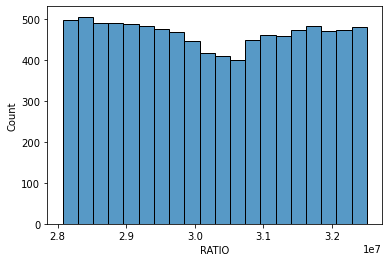

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set(style="darkgrid")
# trans_data = sns.load_dataset("iris")

sns.histplot(data=df, x="RATIO", bins=20)
plt.show()

In [34]:
df.columns

Index(['Status', 'TR1', 'TR2', 'TR3', 'TR4', 'TR_DATE', 'IS_OK', 'RATIO',
       'VON_RATIO'],
      dtype='object')

array([[<AxesSubplot:title={'center':'TR4'}>,
        <AxesSubplot:title={'center':'RATIO'}>],
       [<AxesSubplot:title={'center':'IS_OK'}>, <AxesSubplot:>]],
      dtype=object)

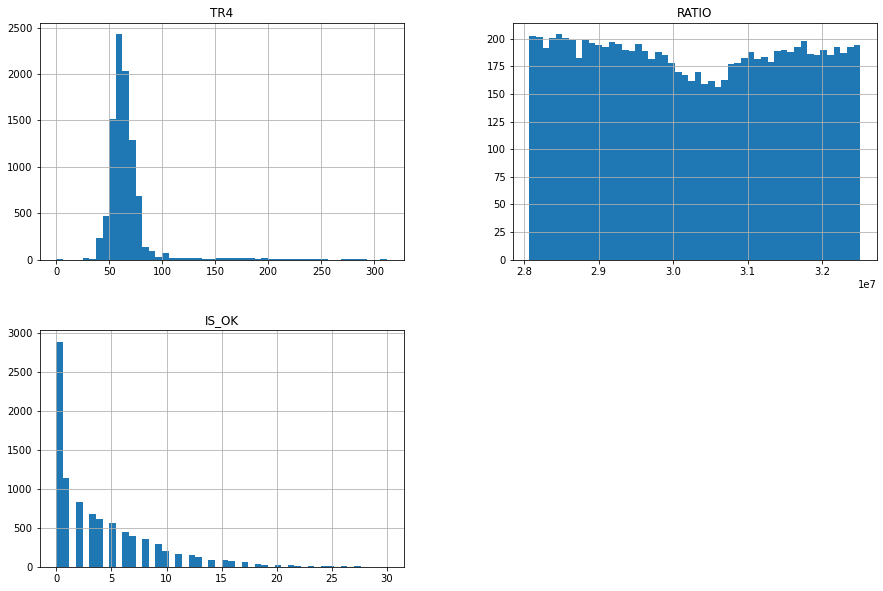

In [35]:

clist = ['TR4', 'RATIO', 'IS_OK']
df_hist = df[clist]
df_hist.hist(bins=50, figsize=(15,10))


In [36]:
numaric_call = ['Status', 'TR1', 'TR2', 'TR3', 'TR4', 'TR_DATE', 'IS_OK', 'RATIO',
       'VON_RATIO']
data = df[numaric_call]
data.head()

,Status,TR1,TR2,TR3,TR4,TR_DATE,IS_OK,RATIO,VON_RATIO
0,0,78,47,668,78,0,0,28071995,158324
1,0,78,47,668,78,1,0,28072438,158324
2,0,76,48,668,76,2,1,28072887,158324
3,0,76,48,668,76,3,1,28073334,158324
4,0,60,61,668,60,4,0,28074100,158324


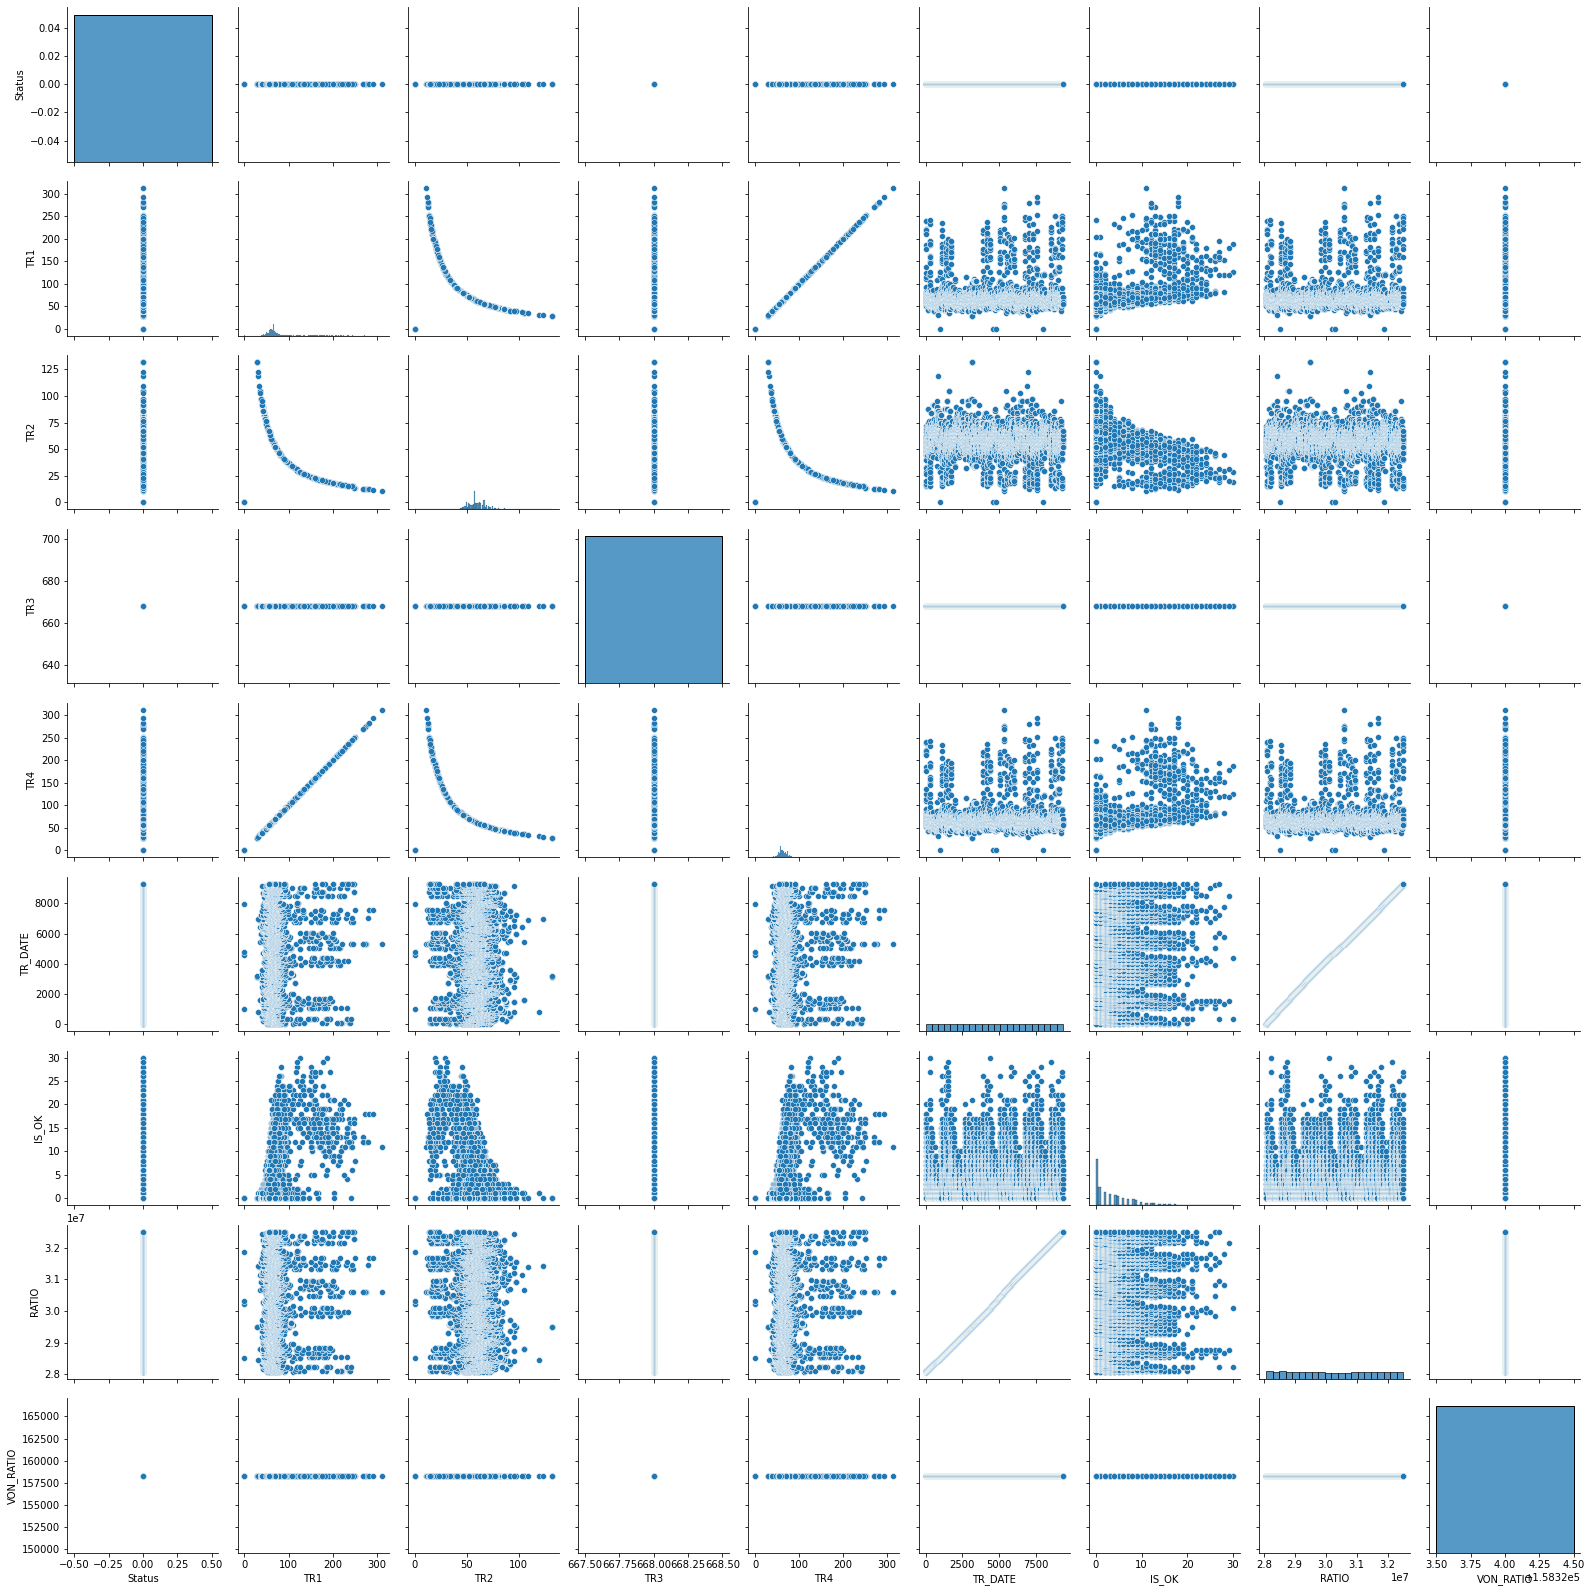

In [37]:
sns.pairplot(data=data)

In [38]:
dataset = data.copy()
dataset.isna().sum()

Status       0
TR1          0
TR2          0
TR3          0
TR4          0
TR_DATE      0
IS_OK        0
RATIO        0
VON_RATIO    0
dtype: int64

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TR4', ylabel='Density'>

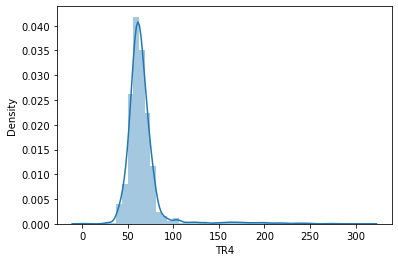

In [40]:
sns.distplot(dataset['TR4'])

In [41]:
dataset.corr()

,Status,TR1,TR2,TR3,TR4,TR_DATE,IS_OK,RATIO,VON_RATIO
Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TR1,NaN,1.000000,-0.816625,NaN,1.000000,0.050352,0.440167,0.051328,NaN
TR2,NaN,-0.816625,1.000000,NaN,-0.816625,-0.063743,-0.445217,-0.064632,NaN
TR3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TR4,NaN,1.000000,-0.816625,NaN,1.000000,0.050352,0.440167,0.051328,NaN
TR_DATE,NaN,0.050352,-0.063743,NaN,0.050352,1.000000,0.019221,0.999745,NaN
IS_OK,NaN,0.440167,-0.445217,NaN,0.440167,0.019221,1.000000,0.018740,NaN
RATIO,NaN,0.051328,-0.064632,NaN,0.051328,0.999745,0.018740,1.000000,NaN
VON_RATIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

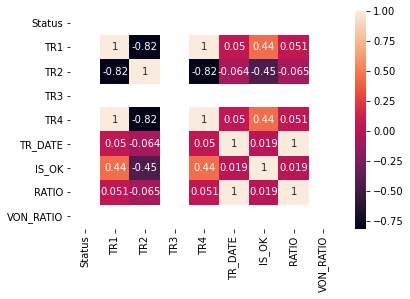

In [42]:
sns.heatmap(dataset.corr(),annot=True)

In [43]:
data.columns

Index(['Status', 'TR1', 'TR2', 'TR3', 'TR4', 'TR_DATE', 'IS_OK', 'RATIO',
       'VON_RATIO'],
      dtype='object')

In [44]:
X= data[['TR1', 'TR2', 'TR3', 'TR4', 'TR_DATE', 'IS_OK', 'RATIO',
       'VON_RATIO']]
y = data['Status']

In [45]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((6514, 8), (2792, 8))

In [46]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [47]:
print("Find Constant and Non-Constant Features:\n",var_thres.get_support())
print("No. of Non-Constant Features: ",len(X_train.columns[var_thres.get_support()]))

Find Constant and Non-Constant Features:
 [ True  True False  True  True  True  True False]
No. of Non-Constant Features:  6


In [48]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

for column in constant_columns:
    print(column)

2
TR3
VON_RATIO


In [49]:
X_train=X_train.drop(constant_columns,axis=1)
X_test=X_test.drop(constant_columns,axis=1)

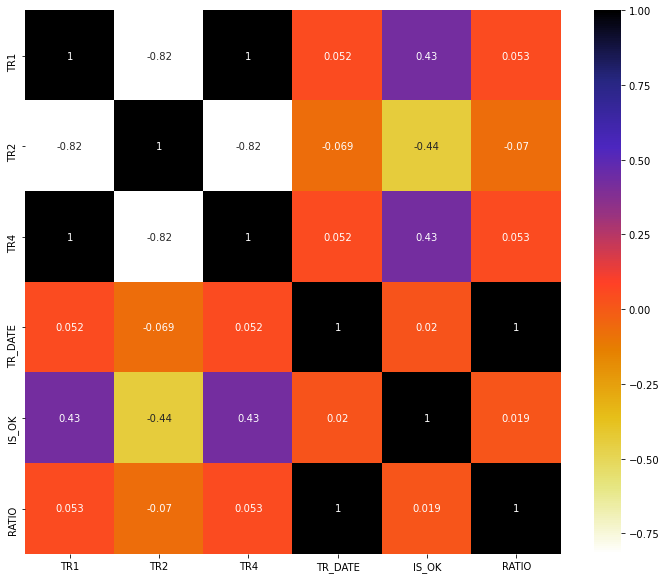

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [51]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [52]:
corr_features = correlation(X_train, 0.7)
print("No. of Correlation Features:",len(set(corr_features)))
corr_features


No. of Correlation Features: 3


{'RATIO', 'TR2', 'TR4'}

In [53]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

In [54]:
from sklearn import preprocessing
from sklearn import utils
print(utils.multiclass.type_of_target(y_train))

binary


In [55]:
utils.multiclass.type_of_target(X_train.astype('int'))
utils.multiclass.type_of_target(y_train.astype('int'))

'binary'

In [56]:
mp=10
X_train.head(2)

,TR1,TR_DATE,IS_OK
4673,59,4673,6
7842,63,7842,5


c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

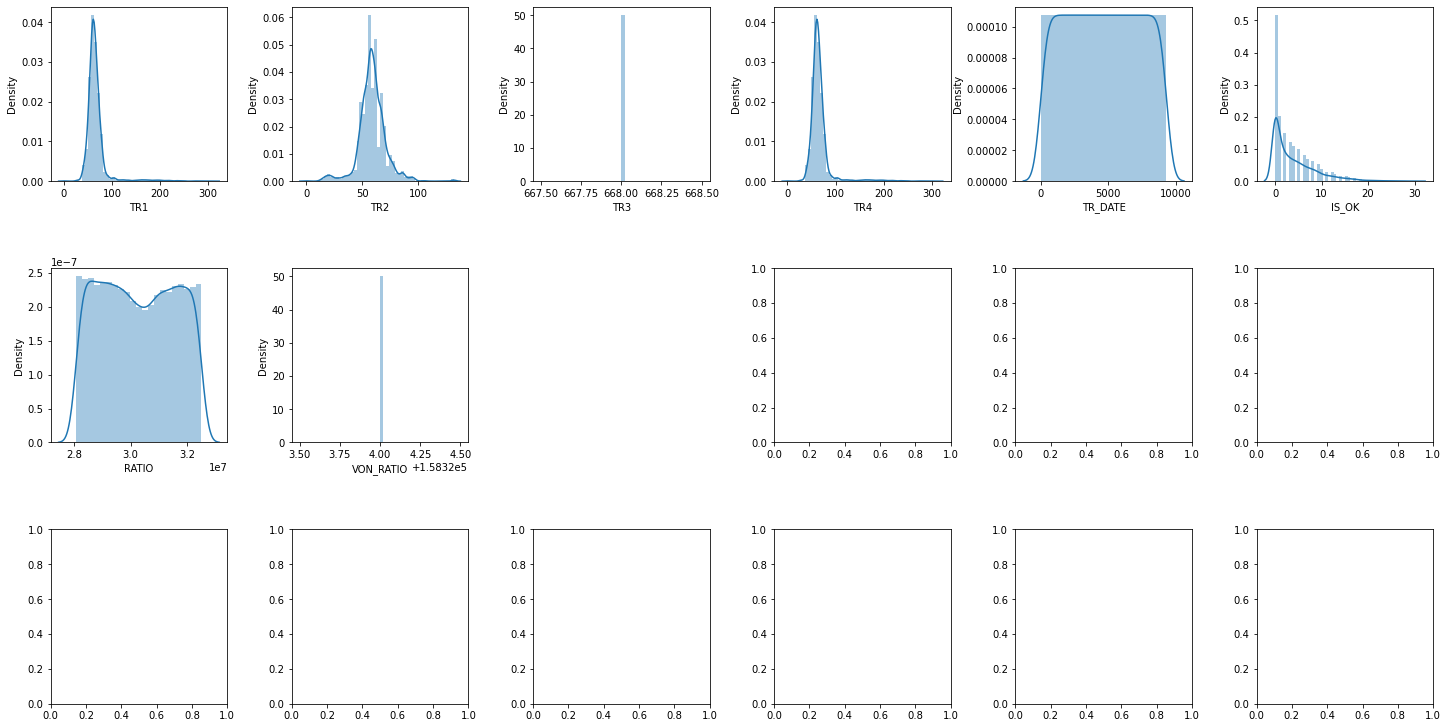

In [57]:
# checking distributions of all features
fig, axs = plt.subplots(ncols=6,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in X.items():
    sns.distplot(v, ax=axs[index])
    index+=1

fig.delaxes(axs[index]) # deleting the 18th figure
plt.tight_layout(pad=0.3, w_pad=0.2,h_pad = 4.5)

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [59]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

In [47]:
### KNeighbors

In [87]:
#%%time
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
model1 = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
end_train = time.time()
y_predictions = model1.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [88]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['kNN'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F1-Score: 100.00%
time to train: 0.04 s
time to predict: 0.10 s
total: 0.14 s


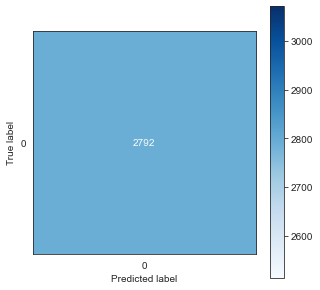

In [89]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model1, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [51]:
### RandomForest

In [90]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model2 = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model2.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 201 ms


In [91]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F1-Score: 100.00%
time to train: 0.18 s
time to predict: 0.02 s
total: 0.20 s


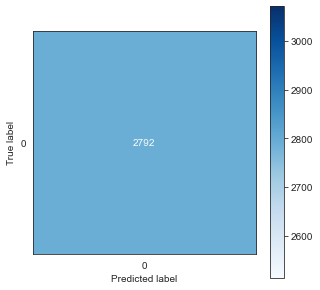

In [92]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model2, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [66]:
print('Report:\n',classification_report(y_test, y_predictions))

Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2792

    accuracy                           1.00      2792
   macro avg       1.00      1.00      1.00      2792
weighted avg       1.00      1.00      1.00      2792



### DecisionTree

In [67]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model3 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model3.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 27.9 ms


In [68]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F1-Score: 100.00%
time to train: 0.02 s
time to predict: 0.01 s
total: 0.03 s


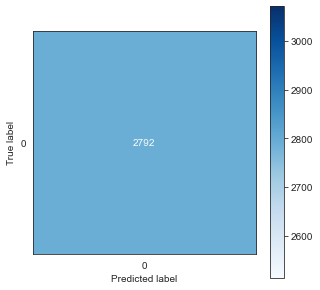

In [69]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model3, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [59]:
### Navie Bayes

In [70]:
#%%time
from sklearn.naive_bayes import MultinomialNB
start = time.time()
model4 = MultinomialNB().fit(X_train,y_train)
end_train = time.time()
y_predictions = model4.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [71]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Naive Bayes'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F1-Score: 100.00%
time to train: 0.01 s
time to predict: 0.01 s
total: 0.02 s


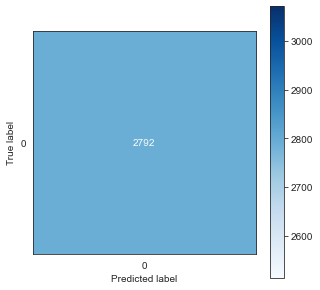

In [72]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model4, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [63]:
### AdaBoostClassifier

In [73]:
%%time
from sklearn.ensemble import AdaBoostClassifier
start = time.time()
model5 = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model5.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 35.9 ms


In [74]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['AdaBoost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F1-Score: 100.00%
time to train: 0.03 s
time to predict: 0.01 s
total: 0.04 s


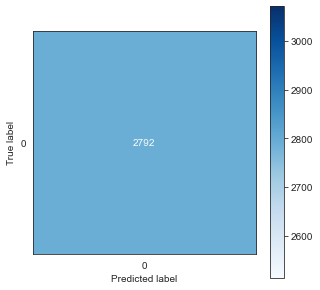

In [75]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model5, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [67]:
### CAT Boost

In [76]:
%%time
from xgboost import XGBClassifier
start = time.time()
model6 =  XGBClassifier(n_estimators=100, learning_rate=1.0, random_state=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model6.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 1.23 s


In [77]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['XG Boost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F1-Score: 100.00%
time to train: 0.90 s
time to predict: 0.01 s
total: 0.91 s


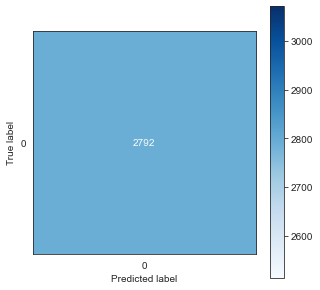

In [78]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model6, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [73]:
### GradientBoost

In [81]:
%%time
from catboost import CatBoostClassifier
start = time.time()
model7 = CatBoostClassifier(iterations=100).fit(X_train,y_train)
end_train = time.time()
y_predictions = model7.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 0 ns


In [78]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Cat Boost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F1-Score: 100.00%
time to train: -595.02 s
time to predict: 0.01 s
total: -595.01 s


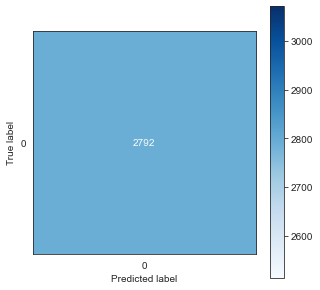

In [83]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model7, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [85]:
### LinearRegression

In [93]:
#%%time
from sklearn.linear_model import LinearRegression
start = time.time()
model0 = LinearRegression()
model0.fit(X_train,y_train)
end_train = time.time()
y_predictions = model0.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [94]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['LR'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 100.00%
Recall: 100.00%
Precision: 100.00%
F1-Score: 100.00%
time to train: 0.03 s
time to predict: 0.00 s
total: 0.04 s


In [80]:
### ExtraTree

In [96]:
from sklearn.feature_selection import mutual_info_classif
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
kNN,100.00%,100.00%,100.00%,100.00%,0.0,0.1,0.1
Random Forest,100.00%,100.00%,100.00%,100.00%,0.2,0.0,0.2
Decision Tree,100.00%,100.00%,100.00%,100.00%,0.0,0.0,0.0
Naive Bayes,100.00%,100.00%,100.00%,100.00%,0.0,0.0,0.0
AdaBoost,100.00%,100.00%,100.00%,100.00%,0.0,0.0,0.0
XG Boost,100.00%,100.00%,100.00%,100.00%,0.9,0.0,0.9
LR,100.00%,100.00%,100.00%,100.00%,0.0,0.0,0.0
